In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_identity = '/content/drive/My Drive/kaggle/fraud-detection/train_identity.csv'
train_identity_df = pd.read_csv(train_identity)

train_transaction = '/content/drive/My Drive/kaggle/fraud-detection/train_transaction.csv'
train_transaction_df = pd.read_csv(train_transaction)

In [ ]:
train_transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
train_identity_df

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,427.0,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,352.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.1.1,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,27.0,567.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,-300.0,Found,Found,166.0,15.0,352.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_9_5,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


0    569877
1     20663
Name: isFraud, dtype: int64


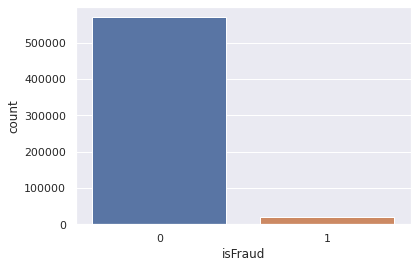

In [ ]:
import seaborn as sns

label_distribution = train_transaction_df['isFraud'].value_counts()
print(label_distribution)

sns.set(style="darkgrid")
ax = sns.countplot(x="isFraud", data=train_transaction_df[['isFraud']])

In [ ]:
train_transaction_df = pd.merge(train_transaction_df, train_identity_df, how='left', on='TransactionID')

In [ ]:
train_transaction_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,87.0,3.0,NaN,aol.com,NaN,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,5.0,1.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [ ]:
train_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/train_transaction_merged.csv', index=False)

In [ ]:
categorical_feats = ['TransactionID', 'ProductCD']

for i in range(1,7):
  categorical_feats.append('card' + str(i))

categorical_feats.append('addr1')
categorical_feats.append('addr2')
categorical_feats.append('P_emaildomain')
categorical_feats.append('R_emaildomain')
categorical_feats.append('DeviceType')
categorical_feats.append('DeviceInfo')

for i in range(12,39):
  categorical_feats.append('id_' + str(i))

for i in range(1,10):
  categorical_feats.append('M' + str(i))

In [ ]:
num_feats = ['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']
for i in range(1,12):
  if i < 10:
    num_feats.append('id_0' + str(i))
  else:
    num_feats.append('id_' + str(i))

for i in range(1,15):
  num_feats.append('C' + str(i))

for i in range(1,16):
  num_feats.append('D' + str(i))

for i in range(1,340):
  num_feats.append('V' + str(i))

# Exploratory Data Analysis (EDA)

# Categorical Features

3147775    0.000002
3089230    0.000002
3189951    0.000002
3187902    0.000002
3194045    0.000002
             ...   
3043995    0.000002
3046042    0.000002
3039897    0.000002
3041944    0.000002
3145728    0.000002
Name: TransactionID, Length: 590540, dtype: float64


W    0.744522
C    0.116028
R    0.063838
H    0.055922
S    0.019690
Name: ProductCD, dtype: float64


7919     0.025285
9500     0.023981
15885    0.017545
17188    0.017516
15066    0.013454
           ...   
12390    0.000002
10341    0.000002
10006    0.000002
15743    0.000002
17105    0.000002
Name: card1, Length: 13553, dtype: float64


321.0    0.082865
111.0    0.076525
555.0    0.071113
490.0    0.064593
583.0    0.036920
           ...   
447.0    0.000066
153.0    0.000064
557.0    0.000063
473.0    0.000030
582.0    0.000024
Name: card2, Length: 501, dtype: float64


150.0    0.882729
185.0    0.095414
106.0    0.002660
NaN      0.002650
146.0    0.002120
           ...   
199.0    0.000002
164.0    0.0

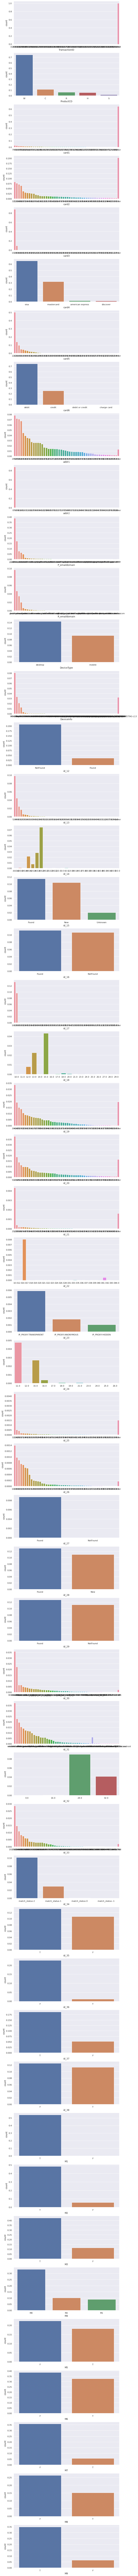

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_, axes = plt.subplots(nrows=len(categorical_feats), ncols=1, figsize=(10, 5*len(categorical_feats)))

for idx_row, cf in enumerate(categorical_feats):
  value_distribution = train_transaction_df[cf].value_counts(dropna=False, normalize=True)
  print(value_distribution)
  print('\n')
  value_distribution = value_distribution.to_dict()
  new_value_distribution = dict()
  count = 0
  for i,(k,v) in enumerate(value_distribution.items()):
    if i < 50:
      new_value_distribution[k] = v
    else:
      count += value_distribution[k]
      if i == len(value_distribution)-1:
        new_value_distribution['other'] = count
  col1 = []
  col2 = []
  for k,v in new_value_distribution.items():
    col1.append(k)
    col2.append(v)

  new_value_distribution_df = pd.DataFrame(data={cf: col1, 'count': col2})
  ax = sns.barplot(x=cf, y="count", data=new_value_distribution_df, ax=axes[idx_row])
  # ax = sns.countplot(x=cf, data=train_transaction_df[[cf]], ax=axes[idx_row])

In [ ]:
null_values_cf = train_transaction_df[categorical_feats].isna().sum().to_dict()
null_values_cf = pd.DataFrame(data={'Categorical Features': list(null_values_cf.keys()), 'Count Null': list(null_values_cf.values())})
pd.set_option('display.max_rows', None)

In [ ]:
null_values_cf

,Categorical Features,Count Null
0,TransactionID,0
1,ProductCD,0
2,card1,0
3,card2,8933
4,card3,1565
5,card4,1577
6,card5,4259
7,card6,1571
8,addr1,65706
9,addr2,65706


In [ ]:
pd.set_option('display.max_rows', 10)

# Numerical Features

In [ ]:
train_transaction_df[num_feats].hist(figsize=(20, 5*len(num_feats)), bins=100)

In [ ]:
train_transaction_df[['id_05', 'id_06', 'id_11']].mode()

,id_05,id_06,id_11
0,0.0,0.0,100.0


In [ ]:
print(train_transaction_df['id_05'].value_counts())
print('\n')
print(train_transaction_df['id_06'].value_counts())
print('\n')
print(train_transaction_df['id_11'].value_counts())

 0.0     92743
 1.0      8293
 2.0      4937
 3.0      3854
 4.0      2941
         ...  
-34.0        1
-38.0        1
-44.0        1
-39.0        1
-35.0        1
Name: id_05, Length: 93, dtype: int64


 0.0     91325
-1.0      4687
-5.0      3849
-6.0      3257
-9.0      2634
         ...  
-91.0        4
-80.0        2
-95.0        2
-99.0        1
-89.0        1
Name: id_06, Length: 101, dtype: int64


100.000000    133162
95.080002       1231
95.160004        754
97.120003        440
96.669998        333
               ...  
94.849998          1
92.540001          1
94.949997          1
92.660004          1
97.660004          1
Name: id_11, Length: 365, dtype: int64


In [ ]:
null_values_nf = train_transaction_df[num_feats].isna().sum().to_dict()
null_values_nf = pd.DataFrame(data={'Numerical Features': list(null_values_nf.keys()), 'Count Null': list(null_values_nf.values())})
pd.set_option('display.max_rows', None)

In [ ]:
null_values_nf

,Numerical Features,Count Null
0,TransactionAmt,0
1,dist1,352271
2,dist2,552913
3,id_01,446307
4,id_02,449668
5,id_03,524216
6,id_04,524216
7,id_05,453675
8,id_06,453675
9,id_07,585385


In [ ]:
pd.set_option('display.max_rows', 10)

# Preprocessing & Feature Engineering



# Raw Features

In [ ]:
possible_cat_feat_values = dict()

In [ ]:
exist_notexist = ['addr1', 'id_26', 'id_30', 'id_33', 'id_07', 'id_08']

take_all = ['ProductCD', 'card4', 'card6', 'DeviceType',
              'id_12', 'id_15', 'id_16', 'id_23', 'id_27',
              'id_28', 'id_29', 'id_32', 'id_34', 'id_35',
              'id_36', 'id_37', 'id_38']
take_one_most = ['id_21', 'id_25', 'addr2']
take_two_most = ['card3', 'id_17', 'id_22', 'id_24']
take_three_most = ['id_18']
take_four_most = ['DeviceInfo', 'id_13', 'id_14', 'P_emaildomain', 'R_emaildomain']
take_five_most = ['card5']
mode = ['dist2', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06',
          'id_09', 'id_10', 'id_11']

for cf in categorical_feats:
  all_possibilities = train_transaction_df[cf].value_counts()

  if cf in take_all:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())] + [cf + '=other', cf + '=kosong'])

  elif cf in take_one_most:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())[:1]] + [cf + '=other', cf + '=kosong'])

  elif cf in take_two_most:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())[:2]] + [cf + '=other', cf + '=kosong'])

  elif cf in take_three_most:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())[:3]] + [cf + '=other', cf + '=kosong'])

  elif cf in take_four_most:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())[:4]] + [cf + '=other', cf + '=kosong'])

  elif cf in take_five_most:
    possible_cat_feat_values[cf] = sorted([cf + '=' + str(val) for val in list(all_possibilities.to_dict().keys())[:5]] + [cf + '=other', cf + '=kosong'])

  elif cf in exist_notexist:
    possible_cat_feat_values[cf] = [cf + '=ada', cf + '=kosong']

In [ ]:
def change_cat_feat_value(feat_value, possible_cat_feat_values, feat_name):
  if possible_cat_feat_values[feat_name] != [feat_name + '=ada', feat_name + '=kosong']:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    elif feat_name + '=' + str(feat_value) not in possible_cat_feat_values[feat_name]:
      return feat_name + '=other'
    else:
      return feat_name + '=' + str(feat_value)
  else:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    else:
      return feat_name + '=ada'

In [ ]:
for feat_name in list(possible_cat_feat_values.keys()):
  train_transaction_df[feat_name] = train_transaction_df[feat_name].apply(change_cat_feat_value, args=(possible_cat_feat_values, feat_name))

In [ ]:
nf_type_1 = ['TransactionAmt']
nf_type_2 = ['dist2', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06',
          'id_09', 'id_10', 'id_11']
nf_type_3 = ['id_07', 'id_08']
nf_type_4 = ['id_02']

nf_type_dict = {'type_2': nf_type_2, 'type_3': nf_type_3}

In [ ]:
def convert_to_categorical(feat_value, possible_cat_feat_values, feat_name, mode=None):
  if len(possible_cat_feat_values[feat_name]) == 3:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    elif feat_name + '=' + str(feat_value) == feat_name + '=' + mode:
      return feat_name + '=' + mode
    else:
      return feat_name + '=non-mode'

  elif len(possible_cat_feat_values[feat_name]) == 2:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    else:
      return feat_name + '=ada'

In [ ]:
for feat_name in num_feats:
  if feat_name in nf_type_dict['type_2']:
    mode = str(train_transaction_df[[feat_name]].mode().iat[0,0])
    possible_cat_feat_values[feat_name] = sorted([feat_name + '=' + mode, feat_name + '=non-mode', feat_name + '=kosong'])
    train_transaction_df[feat_name] = train_transaction_df[feat_name].apply(convert_to_categorical, args=(possible_cat_feat_values, feat_name, mode))

  elif feat_name in nf_type_dict['type_3']:
    possible_cat_feat_values[feat_name] = sorted([feat_name + '=ada', feat_name + '=kosong'])
    train_transaction_df[feat_name] = train_transaction_df[feat_name].apply(convert_to_categorical, args=(possible_cat_feat_values, feat_name))

In [ ]:
import json
with open('/content/drive/My Drive/kaggle/fraud-detection/features_categories.json', 'w') as fp:
  json.dump(possible_cat_feat_values, fp)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_transaction_df['TransactionAmt'] = scaler.fit_transform(train_transaction_df['TransactionAmt'].to_numpy().reshape(-1, 1))

In [ ]:
from joblib import dump

dump(scaler, '/content/drive/My Drive/kaggle/fraud-detection/minmax_transaction_amt.joblib')

['/content/drive/My Drive/kaggle/fraud-detection/minmax_transaction_amt.joblib']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

exist_notexist = ['addr1', 'id_26', 'id_30', 'id_33']
take_all = ['ProductCD', 'card4', 'card6', 'DeviceType',
              'id_12', 'id_15', 'id_16', 'id_23', 'id_27',
              'id_28', 'id_29', 'id_32', 'id_34', 'id_35',
              'id_36', 'id_37', 'id_38']
take_one_most = ['id_21', 'id_25', 'addr2']
take_two_most = ['card3', 'id_17', 'id_22', 'id_24']
take_three_most = ['id_18']
take_four_most = ['DeviceInfo', 'id_13', 'id_14', 'P_emaildomain', 'R_emaildomain']
take_five_most = ['card5']
mode = ['dist2', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06',
          'id_09', 'id_10', 'id_11']
feat_to_convert = take_all + take_one_most + take_two_most + take_three_most + take_four_most + take_five_most + exist_notexist + mode

df_train_columns = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/train_transaction_merged.csv').columns
categories = [possible_cat_feat_values[col] for col in df_train_columns if col in possible_cat_feat_values]
feat_to_convert = [col for col in df_train_columns if col in possible_cat_feat_values]

enc = OneHotEncoder(categories=categories, sparse=False, dtype=np.int)

new_train_transaction_df_1 = enc.fit_transform(train_transaction_df[feat_to_convert])

new_columns = []
for category in categories:
  for col in category:
    new_columns.append(col)

transaction_id_df = train_transaction_df[['TransactionID']]

train_transaction_df['TransactionDT'] = train_transaction_df['TransactionDT'].apply(lambda x: (int(x/3600))%24)
transaction_dt_df = train_transaction_df[['TransactionDT']]

new_train_transaction_df_1 = pd.DataFrame(new_train_transaction_df_1, columns=new_columns)
new_train_transaction_df_2 = train_transaction_df[['TransactionAmt', 'id_02']]
isFraud_df = train_transaction_df[['isFraud']]

new_train_transaction_df = pd.concat([transaction_id_df, transaction_dt_df, new_train_transaction_df_1, new_train_transaction_df_2, isFraud_df], axis=1)

In [ ]:
new_train_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02,isFraud
0,2987000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.278167,NaN,0
1,2987001,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.443327,NaN,0
2,2987002,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.317889,NaN,0
3,2987003,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.355521,NaN,0
4,2987004,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,-0.355521,70787.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,NaN,0
590536,3577536,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.399424,NaN,0
590537,3577537,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.435174,NaN,0
590538,3577538,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.075376,NaN,0


In [ ]:
new_train_transaction_df.drop(columns=['id_02']).isnull().values.any()

False

In [ ]:
from sklearn.ensemble import RandomForestRegressor

train_df_im = new_train_transaction_df[new_train_transaction_df['id_02'].notna()]
X_train_im = train_df_im.drop(columns=['TransactionID','id_02', 'isFraud'])
y_train_im = train_df_im['id_02']

regr = RandomForestRegressor(max_depth=10, random_state=42, n_jobs=-1, n_estimators=100, min_samples_split=5, min_samples_leaf=1)
regr.fit(X_train_im, y_train_im)

X_test_im = new_train_transaction_df[new_train_transaction_df['id_02'].isna()].drop(columns=['TransactionID','id_02', 'isFraud'])
y_pred_im = regr.predict(X_test_im)

In [ ]:
from joblib import dump

dump(regr, '/content/drive/My Drive/kaggle/fraud-detection/rf-imputation.joblib')

['/content/drive/My Drive/kaggle/fraud-detection/rf-imputation.joblib']

In [ ]:
y_pred_im

array([ 40287.10330004, 110591.42049001, 104822.27428896, ...,
        96552.70473159, 110739.24259841, 170400.6000475 ])

In [ ]:
null_id_02_index = X_test_im.index
new_train_transaction_df.loc[null_id_02_index, 'id_02'] = y_pred_im

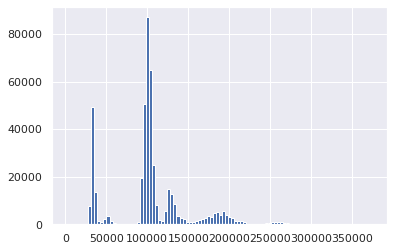

In [ ]:
new_train_transaction_df.loc[null_id_02_index, 'id_02'].hist(bins=100)

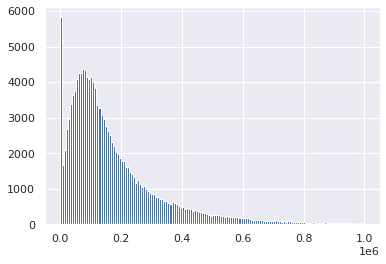

In [ ]:
y_train_im.hist(bins=150)

In [ ]:
scaler = StandardScaler()
new_train_transaction_df['id_02'] = scaler.fit_transform(new_train_transaction_df['id_02'].to_numpy().reshape(-1, 1))

In [ ]:
from joblib import dump

dump(scaler, '/content/drive/My Drive/kaggle/fraud-detection/minmax_id_02.joblib')

['/content/drive/My Drive/kaggle/fraud-detection/minmax_id_02.joblib']

In [ ]:
new_train_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1.csv', index=False)

# Engineered Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

feat_to_convert = []
categories = []
for i in range(1,10):
  feat_to_convert.append('M' + str(i))
  if i == 4:
    categories.append(sorted(['M0', 'M1', 'M2', 'kosong']))
  else:
    categories.append(sorted(['F', 'T', 'kosong']))

train_transaction_df[feat_to_convert] = train_transaction_df[feat_to_convert].fillna(value='kosong')

enc = OneHotEncoder(categories=categories, sparse=False, dtype=np.int, handle_unknown='ignore')
new_train_transaction_df_1 = enc.fit_transform(train_transaction_df[feat_to_convert])

new_columns = []
for i in range(1,10):
  for cat in categories[i-1]:
    new_columns.append('M' + str(i) + '=' + cat)

new_train_transaction_df_1 = pd.DataFrame(new_train_transaction_df_1, columns=new_columns)

In [ ]:
from joblib import dump

dump(enc, '/content/drive/My Drive/kaggle/fraud-detection/encoder_engineered_features.joblib')

['/content/drive/My Drive/kaggle/fraud-detection/encoder_engineered_features.joblib']

In [ ]:
new_train_transaction_df_1

,M1=F,M1=T,M1=kosong,M2=F,M2=T,M2=kosong,M3=F,M3=T,M3=kosong,M4=M0,M4=M1,M4=M2,M4=kosong,M5=F,M5=T,M5=kosong,M6=F,M6=T,M6=kosong,M7=F,M7=T,M7=kosong,M8=F,M8=T,M8=kosong,M9=F,M9=T,M9=kosong
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
590536,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
590537,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
590538,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1


In [ ]:
feat_to_fillna = train_transaction_df.filter(regex=("[CDV]\d+")).columns

fillna_dict = {}
for feat in feat_to_fillna:
  fillna_value = train_transaction_df[[feat]].min(numeric_only=True)[0]-1000
  fillna_dict[feat] = fillna_value
  train_transaction_df[[feat]] = train_transaction_df[[feat]].fillna(value=fillna_value)

new_train_transaction_df_2 = train_transaction_df[feat_to_fillna]

In [ ]:
import json
with open('/content/drive/My Drive/kaggle/fraud-detection/fillna_dict.json', 'w') as fd:
  json.dump(fillna_dict, fd)

In [ ]:
new_train_transaction_df_2

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,-1000.0,13.0,-1122.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,13.0,13.0,-1083.0,-1000.0,-1193.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,-1000.0,-1000.0,0.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,0.0,-1053.0,-1083.0,-1000.0,-1193.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1000.0,-1000.0,0.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,0.0,315.0,-1083.0,-1000.0,-1193.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,-1083.0,-1000.0,-1000.0,-1000.0,84.0,-1053.0,-1083.0,-1000.0,-1193.0,111.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,-1000.0,-1000.0,-1122.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,-1000.0,-1053.0,-1083.0,-1000.0,-1193.0,-1083.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,-1122.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,56.0,56.0,-1083.0,-1000.0,-1193.0,56.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
590536,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,-1000.0,-1000.0,0.0,-1000.0,-1083.0,-1000.0,-1000.0,-1000.0,0.0,0.0,-1083.0,-1000.0,-1193.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.

In [ ]:
transaction_id_df = train_transaction_df[['TransactionID']]
isFraud_df = train_transaction_df[['isFraud']]
new_train_transaction_df = pd.concat([transaction_id_df, new_train_transaction_df_1, new_train_transaction_df_2, isFraud_df], axis=1)

In [ ]:
new_train_transaction_df

,TransactionID,M1=F,M1=T,M1=kosong,M2=F,M2=T,M2=kosong,M3=F,M3=T,M3=kosong,M4=M0,M4=M1,M4=M2,M4=kosong,M5=F,M5=T,M5=kosong,M6=F,M6=T,M6=kosong,M7=F,M7=T,M7=kosong,M8=F,M8=T,M8=kosong,M9=F,M9=T,M9=kosong,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,...,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,isFraud
0,2987000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
1,2987001,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
2,2987002,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
3,2987003,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
4,2987004,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
590536,3577536,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
590537,3577537,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
590538,3577538,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,

In [ ]:
new_train_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_2.csv', index=False)

# Raw + Engineered Features

In [ ]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1.csv').drop(columns=['isFraud'])
df_2 = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_2.csv')
new_train_transaction_df = pd.merge(df_1, df_2, how='inner', on='TransactionID')

In [ ]:
new_train_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,isFraud
0,2987000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
1,2987001,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
2,2987002,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
3,2987003,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
4,2987004,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
590536,3577536,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,0
590537,3577537,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1

In [ ]:
new_train_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_3.csv', index=False)

# Experiment

Raw Features

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1.csv')
X_df = df.drop(columns=['isFraud'])
y_df = df['isFraud']

Raw + Engineered Features

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_3.csv')
X_df = df.drop(columns=['isFraud'])
y_df = df['isFraud']

Count Label Instances

In [ ]:
dist = df['isFraud'].value_counts()
neg_instances = dist[0]
pos_instances = dist[1]
df = None

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [1000]
max_features = ['sqrt', 0.1]
max_depth = [10,15,30]
min_samples_split = [2, 5, 10, 15]
bootstrap = [True]
class_weight = ['balanced_subsample']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap,
               'class_weight': class_weight}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 10, verbose=10, n_jobs = -1, scoring='roc_auc')
rf_random.fit(X_df, y_df)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 22.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 45.9min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 115.1min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
from joblib import dump

dump(rf_random, '/content/drive/My Drive/kaggle/fraud-detection/rf_fe_1.joblib')

['/content/drive/My Drive/kaggle/fraud-detection/rf_fe_1.joblib']

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_random.best_score_

0.7887901152586048

# XGBoost (Hyperparameter Search)

Raw Features

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

dtrain = xgb.DMatrix(X_df, label=y_df)
xgb_clf = xgb.XGBClassifier()

n_estimators = [15]
eta = [0.3]
gamma =  [0.1, 0.5, 1, 1.5, 2, 5]
max_depth = [10, 15, 30, 50]
min_child_weight = [0.01, 0.1, 0.5, 1, 5, 10]
reg_lambda = [1]
scale_pos_weight = [neg_instances/pos_instances]
verbosity=[2]
params = {
    'n_estimators': n_estimators,
    'eta': eta,
    'gamma': gamma,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'reg_lambda': reg_lambda,
    'scale_pos_weight': scale_pos_weight,
    'verbosity': verbosity,
}

xgboost_random = RandomizedSearchCV(xgb_clf, param_distributions=params, cv=10, n_iter=10, scoring='roc_auc')
xgboost_random.fit(X_df, y_df)

In [ ]:
xgboost_random.best_score_

In [ ]:
from joblib import dump

dump(xgboost_random, '/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_1.joblib')

Raw + Engineered Features

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.1, random_state=42)

1. Tuning max_depth and min_child_weight

In [ ]:
import numpy as np
np.random.seed(42)

initial_params = {'eta': 0.3,
 'gamma': 5,
 'n_estimators': 15,
 'reg_lambda': 1,
 'scale_pos_weight': neg_instances/pos_instances,
 'verbosity': 2,
 'objective': 'binary:logistic'
}

max_depth = [10, 15, 30, 40, 50]
min_child_weight = [1, 2, 5, 10, 15]
all_hyp = [[mcw, md] for mcw in min_child_weight for md in max_depth]

chosen_indices = np.random.choice(len(max_depth)*len(min_child_weight), 10, replace=False)
chosen_hyp = [all_hyp[ci] for ci in chosen_indices]

In [ ]:
from sklearn.metrics import roc_auc_score

best_mcw = None
best_md = None
best_auc = 0
for hyp in chosen_hyp:
  initial_params['min_child_weight'] = hyp[0]
  initial_params['max_depth'] = hyp[1]
  for i in range(0, 540000, 20000):
    print('i=' + str(i))
    if i == 0:
      xgb_clf = xgb.XGBClassifier(eta=initial_params['eta'], gamma=initial_params['gamma'], 
                                  n_estimators=initial_params['n_estimators'],
                                  reg_lambda=initial_params['reg_lambda'],
                                  scale_pos_weight=initial_params['scale_pos_weight'],
                                  verbosity=initial_params['verbosity'],
                                  objective=initial_params['objective'],
                                  min_child_weight=initial_params['min_child_weight'],
                                  max_depth=initial_params['max_depth'])
      xgb_clf.fit(X_train.iloc[i:i+20000, :], y_train[i:i+20000])
    else:
      xgb_clf = xgb.XGBClassifier(eta=initial_params['eta'], gamma=initial_params['gamma'], 
                                  n_estimators=initial_params['n_estimators'],
                                  reg_lambda=initial_params['reg_lambda'],
                                  scale_pos_weight=initial_params['scale_pos_weight'],
                                  verbosity=initial_params['verbosity'],
                                  objective=initial_params['objective'],
                                  min_child_weight=initial_params['min_child_weight'],
                                  max_depth=initial_params['max_depth'])
      xgb_clf.fit(X_train.iloc[i:i+20000, :], y_train[i:i+20000], xgb_model='/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_notfixed_mcw_md.model')

    xgb_clf.save_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_notfixed_mcw_md.model')

  y_scores = xgb_clf.predict_proba(X_test)[:,1]
  current_auc = roc_auc_score(y_test, y_scores)
  if current_auc > best_auc:
    best_mcw = hyp[0]
    best_md = hyp[1]
    best_auc = current_auc
    print("Current best min_child_weight: " + str(best_mcw))
    print("Current best max_depth: " + str(best_md))
    print("Current best auc score: " + str(best_auc))
    print("")
    xgb_clf.save_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_best_mcw_md.model')

In [ ]:
print("Final best min_child_weight: " + str(best_mcw))
print("Final best max_depth: " + str(best_md))
print("Final best auc score in this hyperparameter group: " + str(best_auc))

Final best min_child_weight: 15
Final best max_depth: 40
Final best auc score in this hyperparameter group: 0.8853001454948857


2. Tuning gamma

In [ ]:
import numpy as np
np.random.seed(42)

gamma_candidates = [0, 0.1, 0.5, 1, 2, 5, 8, 10, 15, 25]

current_params = {'eta': 0.3,
 'n_estimators': 15,
 'reg_lambda': 1,
 'min_child_weight': 15,
 'max_depth': 40,
 'scale_pos_weight': neg_instances/pos_instances,
 'verbosity': 2,
 'objective': 'binary:logistic'
}

In [ ]:
from sklearn.metrics import roc_auc_score

best_gamma = None
best_auc = 0
for g in gamma_candidates:
  current_params['gamma'] = g
  for i in range(0, 540000, 20000):
    print('i=' + str(i))
    if i == 0:
      xgb_clf = xgb.XGBClassifier(eta=current_params['eta'], gamma=current_params['gamma'], 
                                  n_estimators=current_params['n_estimators'],
                                  reg_lambda=current_params['reg_lambda'],
                                  scale_pos_weight=current_params['scale_pos_weight'],
                                  verbosity=current_params['verbosity'],
                                  objective=current_params['objective'],
                                  min_child_weight=current_params['min_child_weight'],
                                  max_depth=current_params['max_depth'])
      xgb_clf.fit(X_train.iloc[i:i+20000, :], y_train[i:i+20000])
    else:
      xgb_clf = xgb.XGBClassifier(eta=current_params['eta'], gamma=current_params['gamma'], 
                                  n_estimators=current_params['n_estimators'],
                                  reg_lambda=current_params['reg_lambda'],
                                  scale_pos_weight=current_params['scale_pos_weight'],
                                  verbosity=current_params['verbosity'],
                                  objective=current_params['objective'],
                                  min_child_weight=current_params['min_child_weight'],
                                  max_depth=current_params['max_depth'])
      xgb_clf.fit(X_train.iloc[i:i+20000, :], y_train[i:i+20000], xgb_model='/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_notfixed_mcw_md.model')

    xgb_clf.save_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_notfixed_mcw_md.model')

  y_scores = xgb_clf.predict_proba(X_test)[:,1]
  current_auc = roc_auc_score(y_test, y_scores)
  if current_auc > best_auc:
    best_gamma = g
    best_auc = current_auc
    print("")
    print("Current best gamma: " + str(best_gamma))
    print("Current best auc score: " + str(best_auc))
    print("")
    xgb_clf.save_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3_best_mcw_md.model')

In [ ]:
print("Final best gamma: " + str(best_gamma))
print("Final best auc score in this hyperparameter group: " + str(best_auc))

'''
Final best gamma: 5
Final best auc score: 0.8853001454948857
'''

#XGBoost (Fixed Hyperparameter)

Raw Features

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1.csv')
X_df = df.drop(columns=['TransactionID', 'isFraud'])
y_df = df['isFraud']

In [ ]:
dist = y_df.value_counts()
neg_instances = dist[0]
pos_instances = dist[1]

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# n_estimators = [15]
# eta = [0.3]
# gamma =  [0.1, 0.5, 1, 1.5, 2, 5]
# max_depth = [10, 15, 30, 50]
# min_child_weight = [0.01, 0.1, 0.5, 1, 5, 10]
# reg_lambda = [1]
# scale_pos_weight = [neg_instances/pos_instances]
# verbosity=[2]

params = {'eta': [0.3],
 'gamma': [5],
 'max_depth': [10],
 'min_child_weight': [10],
 'n_estimators': [15],
 'reg_lambda': [1],
 'scale_pos_weight': [neg_instances/pos_instances],
 'verbosity': [2]
}

xgb_clf = xgb.XGBClassifier()
xgboost_random = RandomizedSearchCV(xgb_clf, param_distributions=params, cv=10, n_iter=1, scoring='roc_auc')
xgboost_random.fit(X_df, y_df)

In [ ]:
xgboost_random.best_score_ #0.8028532333600127

In [ ]:
from joblib import dump

dump(xgboost_random, '/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_1.joblib')

Raw + Engineered Features

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_3.csv')
X_df = df.drop(columns=['TransactionID', 'isFraud'])
y_df = df['isFraud']

In [ ]:
df = None

In [ ]:
dist = y_df.value_counts()
neg_instances = dist[0]
pos_instances = dist[1]

In [ ]:
from joblib import dump
import xgboost as xgb

# n_estimators = [15]
# eta = [0.3]
# gamma =  [0.1, 0.5, 1, 1.5, 2, 5]
# max_depth = [10, 15, 30, 50]
# min_child_weight = [0.01, 0.1, 0.5, 1, 5, 10]
# reg_lambda = [1]
# scale_pos_weight = [neg_instances/pos_instances]
# verbosity=[2]

# params = {'eta': [0.3],
#  'gamma': [5],
#  'max_depth': [10],
#  'min_child_weight': [10],
#  'n_estimators': [15],
#  'reg_lambda': [1],
#  'scale_pos_weight': [neg_instances/pos_instances],
#  'verbosity': [3]
# }

for i in range(0, 600000, 100000):
  if i == 0:
    xgb_clf = xgb.XGBClassifier(learning_rate=0.3, gamma=5, max_depth=40,
                                min_child_weight=15, n_estimators=15,
                                reg_lambda=1, scale_pos_weight=neg_instances/pos_instances,
                                verbosity=3)
    xgb_clf.fit(X_df.iloc[i:i+100000, :], y_df[i:i+100000])
  else:
    xgb_clf = xgb.XGBClassifier(learning_rate=0.3, gamma=5, max_depth=40,
                                min_child_weight=15, n_estimators=15,
                                reg_lambda=1, scale_pos_weight=neg_instances/pos_instances,
                                verbosity=3)
    xgb_clf.fit(X_df.iloc[i:i+100000, :], y_df[i:i+100000], xgb_model='/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.model')

  xgb_clf.save_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.model')

# xgb_clf = xgb.XGBClassifier(learning_rate=0.3, gamma=5, max_depth=10,
#                                 min_child_weight=10, n_estimators=15,
#                                 reg_lambda=1, scale_pos_weight=neg_instances/pos_instances,
#                                 verbosity=3)
# xgb_clf.fit(X_df, y_df)
# dump(xgb_clf, '/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.joblib')

[23:22:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1528 extra nodes, 114 pruned nodes, max_depth=29
[23:22:20] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1474 extra nodes, 144 pruned nodes, max_depth=33
[23:22:31] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1408 extra nodes, 176 pruned nodes, max_depth=29
[23:22:42] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1348 extra nodes, 168 pruned nodes, max_depth=32
[23:22:51] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1240 extra nodes, 190 pruned nodes, max_depth=28
[23:23:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1144 extra nodes, 182 pruned nodes, max_depth=32
[23:23:11] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1034 extra nodes, 178 pruned nodes, max_depth=27
[23:23:22] INFO: /workspace/src/tree/updater_prune.cc:74: tree

In [ ]:
xgb_clf = xgb.XGBClassifier(learning_rate=0.3, gamma=5, max_depth=10,
                                min_child_weight=10, n_estimators=15,
                                reg_lambda=1, scale_pos_weight=neg_instances/pos_instances,
                                verbosity=3)
xgb_clf.load_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.model')
xgb_clf.get_booster().dump_model(fout='/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.json', with_stats=True, dump_format='json')

# Predict Test Data

In [ ]:
import pandas as pd
test_identity = '/content/drive/My Drive/kaggle/fraud-detection/test_identity.csv'
test_identity_df = pd.read_csv(test_identity)

test_transaction = '/content/drive/My Drive/kaggle/fraud-detection/test_transaction.csv'
test_transaction_df = pd.read_csv(test_transaction)

In [ ]:
test_transaction_df

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.950,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,W,4476,574.0,150.0,visa,226.0,debit,472.0,87.0,2635.0,NaN,hotmail.com,NaN,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,W,10989,360.0,150.0,visa,166.0,debit,205.0,87.0,17.0,NaN,gmail.com,NaN,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,W,18018,452.0,150.0,mastercard,117.0,debit,264.0,87.0,6.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.679,C,13832,375.0,185.0,mastercard,224.0,debit,284.0,60.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506687,4170236,34214287,12.173,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,157.0,hotmail.com,hotmail.com,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,NaN,NaN,0.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506688,4170237,34214326,49.000,W,16661,490.0,150.0,visa,226.0,debit,327.0,87.0,NaN,NaN,hotmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0000

In [ ]:
test_identity_df

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141902,4170230,-20.0,473365.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,NaN,153.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J700M
141903,4170233,-5.0,489917.0,0.0,0.0,-4.0,-32.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,17.0,417.0,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-J320M
141904,4170234,-5.0,110081.0,NaN,NaN,22.0,-31.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,-300.0,New,NotFound,166.0,15.0,122.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari 10.0,32.0,1334x750,match_status:2,T,F,F,T,mobile,iOS Device
141905,4170236,-45.0,266704.0,NaN,NaN,-3.0,-10.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 43.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,ALE-L23 Build/HuaweiALE-L23


In [ ]:
import re
test_transaction_df = pd.merge(test_transaction_df, test_identity_df, how='left', on='TransactionID')
test_transaction_df.columns = test_transaction_df.columns.map(lambda x: re.sub('id-', 'id_', x) if re.sub('id-', 'id_', x) != None else x)

In [ ]:
test_transaction_df

In [ ]:
categorical_feats = ['TransactionID', 'ProductCD']

for i in range(1,7):
  categorical_feats.append('card' + str(i))

categorical_feats.append('addr1')
categorical_feats.append('addr2')
categorical_feats.append('P_emaildomain')
categorical_feats.append('R_emaildomain')
categorical_feats.append('DeviceType')
categorical_feats.append('DeviceInfo')

for i in range(12,39):
  categorical_feats.append('id_' + str(i))

for i in range(1,10):
  categorical_feats.append('M' + str(i))

In [ ]:
num_feats = ['TransactionDT', 'TransactionAmt', 'dist1', 'dist2']
for i in range(1,12):
  if i < 10:
    num_feats.append('id_0' + str(i))
  else:
    num_feats.append('id_' + str(i))

for i in range(1,15):
  num_feats.append('C' + str(i))

for i in range(1,16):
  num_feats.append('D' + str(i))

for i in range(1,340):
  num_feats.append('V' + str(i))

# Preprocessing & Feature Engineering

# Raw Features

In [ ]:
import json
with open('/content/drive/My Drive/kaggle/fraud-detection/features_categories.json') as fc:
  features_categories = json.load(fc)

In [ ]:
features_categories

{'DeviceInfo': ['DeviceInfo=MacOS',
  'DeviceInfo=Trident/7.0',
  'DeviceInfo=Windows',
  'DeviceInfo=iOS Device',
  'DeviceInfo=kosong',
  'DeviceInfo=other'],
 'DeviceType': ['DeviceType=desktop',
  'DeviceType=kosong',
  'DeviceType=mobile',
  'DeviceType=other'],
 'P_emaildomain': ['P_emaildomain=anonymous.com',
  'P_emaildomain=gmail.com',
  'P_emaildomain=hotmail.com',
  'P_emaildomain=kosong',
  'P_emaildomain=other',
  'P_emaildomain=yahoo.com'],
 'ProductCD': ['ProductCD=C',
  'ProductCD=H',
  'ProductCD=R',
  'ProductCD=S',
  'ProductCD=W',
  'ProductCD=kosong',
  'ProductCD=other'],
 'R_emaildomain': ['R_emaildomain=anonymous.com',
  'R_emaildomain=gmail.com',
  'R_emaildomain=hotmail.com',
  'R_emaildomain=kosong',
  'R_emaildomain=other',
  'R_emaildomain=yahoo.com'],
 'addr1': ['addr1=ada', 'addr1=kosong'],
 'addr2': ['addr2=87.0', 'addr2=kosong', 'addr2=other'],
 'card3': ['card3=150.0', 'card3=185.0', 'card3=kosong', 'card3=other'],
 'card4': ['card4=american express',


In [ ]:
exist_notexist = ['addr1', 'id_26', 'id_30', 'id_33', 'id_07', 'id_08']
take_all = ['ProductCD', 'card4', 'card6', 'DeviceType',
              'id_12', 'id_15', 'id_16', 'id_23', 'id_27',
              'id_28', 'id_29', 'id_32', 'id_34', 'id_35',
              'id_36', 'id_37', 'id_38']
take_one_most = ['id_21', 'id_25', 'addr2']
take_two_most = ['card3', 'id_17', 'id_22', 'id_24']
take_three_most = ['id_18']
take_four_most = ['DeviceInfo', 'id_13', 'id_14', 'P_emaildomain', 'R_emaildomain']
take_five_most = ['card5']
mode = ['dist2', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06',
          'id_09', 'id_10', 'id_11']

group_feat_dict = {'exist_notexist': exist_notexist, 'take': take_all + take_one_most + take_two_most 
                   + take_three_most + take_four_most + take_five_most, 'mode': mode}

In [ ]:
def change_cat_feat_value(feat_value, features_categories, group_feat_dict, feat_name):
  if feat_name in group_feat_dict['exist_notexist']:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    else:
      return feat_name + '=ada'
  
  elif feat_name in group_feat_dict['take']:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    elif feat_name + '=' + str(feat_value) in features_categories[feat_name]:
      return feat_name + '=' + str(feat_value)
    else:
      return feat_name + '=other'
  
  elif feat_name in group_feat_dict['mode']:
    if feat_value != feat_value:
      return feat_name + '=kosong'
    elif feat_name + '=' + str(feat_value) in features_categories[feat_name]:
      return feat_name + '=' + str(feat_value)
    else:
      return feat_name + '=non-mode'

In [ ]:
for feat_name in list(features_categories.keys()):
  test_transaction_df[feat_name] = test_transaction_df[feat_name].apply(change_cat_feat_value, args=(features_categories, group_feat_dict, feat_name))

In [ ]:
test_transaction_df

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.950,ProductCD=W,10409,111.0,card3=150.0,card4=visa,card5=226.0,card6=debit,addr1=ada,addr2=87.0,1.0,dist2=kosong,P_emaildomain=gmail.com,R_emaildomain=kosong,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,...,id_01=kosong,NaN,id_03=kosong,id_04=kosong,id_05=kosong,id_06=kosong,id_07=kosong,id_08=kosong,id_09=kosong,id_10=kosong,id_11=kosong,id_12=kosong,id_13=kosong,id_14=kosong,id_15=kosong,id_16=kosong,id_17=kosong,id_18=kosong,NaN,NaN,id_21=kosong,id_22=kosong,id_23=kosong,id_24=kosong,id_25=kosong,id_26=kosong,id_27=kosong,id_28=kosong,id_29=kosong,id_30=kosong,NaN,id_32=kosong,id_33=kosong,id_34=kosong,id_35=kosong,id_36=kosong,id_37=kosong,id_38=kosong,DeviceType=kosong,DeviceInfo=kosong
1,3663550,18403263,49.000,ProductCD=W,4272,111.0,card3=150.0,card4=visa,card5=226.0,card6=debit,addr1=ada,addr2=87.0,4.0,dist2=kosong,P_emaildomain=other,R_emaildomain=kosong,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,...,id_01=kosong,NaN,id_03=kosong,id_04=kosong,id_05=kosong,id_06=kosong,id_07=kosong,id_08=kosong,id_09=kosong,id_10=kosong,id_11=kosong,id_12=kosong,id_13=kosong,id_14=kosong,id_15=kosong,id_16=kosong,id_17=kosong,id_18=kosong,NaN,NaN,id_21=kosong,id_22=kosong,id_23=kosong,id_24=kosong,id_25=kosong,id_26=kosong,id_27=kosong,id_28=kosong,id_29=kosong,id_30=kosong,NaN,id_32=kosong,id_33=kosong,id_34=kosong,id_35=kosong,id_36=kosong,id_37=kosong,id_38=kosong,DeviceType=kosong,DeviceInfo=kosong
2,3663551,18403310,171.000,ProductCD=W,4476,574.0,card3=150.0,card4=visa,card5=226.0,card6=debit,addr1=ada,addr2=87.0,2635.0,dist2=kosong,P_emaildomain=hotmail.com,R_emaildomain=kosong,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,NaN,136.0,...,id_01=kosong,NaN,id_03=kosong,id_04=kosong,id_05=kosong,id_06=kosong,id_07=kosong,id_08=kosong,id_09=kosong,id_10=kosong,id_11=kosong,id_12=kosong,id_13=kosong,id_14=kosong,id_15=kosong,id_16=kosong,id_17=kosong,id_18=kosong,NaN,NaN,id_21=kosong,id_22=kosong,id_23=kosong,id_24=kosong,id_25=kosong,id_26=kosong,id_27=kosong,id_28=kosong,id_29=kosong,id_30=kosong,NaN,id_32=kosong,id_33=kosong,id_34=kosong,id_35=kosong,id_36=kosong,id_37=kosong,id_38=kosong,DeviceType=kosong,DeviceInfo=kosong
3,3663552,18403310,284.950,ProductCD=W,10989,360.0,card3=150.0,card4=visa,card5=166.0,card6=debit,addr1=ada,addr2=87.0,17.0,dist2=kosong,P_emaildomain=gmail.com,R_emaildomain=kosong,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,NaN,242.0,...,id_01=kosong,NaN,id_03=kosong,id_04=kosong,id_05=kosong,id_06=kosong,id_07=kosong,id_08=kosong,id_09=kosong,id_10=kosong,id_11=kosong,id_12=kosong,id_13=kosong,id_14=kosong,id_15=kosong,id_16=kosong,id_17=kosong,id_18=kosong,NaN,NaN,id_21=kosong,id_22=kosong,id_23=kosong,id_24=kosong,id_25=kosong,id_26=kosong,id_27=kosong,id_28=kosong,id_29=kosong,id_30=kosong,NaN,id_32=kosong,id_33=kosong,id_34=kosong,id_35=kosong,id_36=kosong,id_37=kosong,id_38=kosong,DeviceType=kosong,DeviceInfo=kosong
4,3663553,18403317,67.950,ProductCD=W,18018,452.0,card3=150.0,card4=mastercard,card5=117.0,card6=debit,addr1=ada,addr2=87.0,6.0,dist2=kosong,P_emaildomain=gmail.com,R_emaildomain=kosong,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,22.0,...,id_01=kosong,NaN,id_03=kosong,id_04=kosong,id_05=kosong,id_06=kosong,id_07=kosong,id_08=kosong,id_

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

exist_notexist = ['addr1', 'id_26', 'id_30', 'id_33']
take_all = ['ProductCD', 'card4', 'card6', 'DeviceType',
              'id_12', 'id_15', 'id_16', 'id_23', 'id_27',
              'id_28', 'id_29', 'id_32', 'id_34', 'id_35',
              'id_36', 'id_37', 'id_38']
take_one_most = ['id_21', 'id_25', 'addr2']
take_two_most = ['card3', 'id_17', 'id_22', 'id_24']
take_three_most = ['id_18']
take_four_most = ['DeviceInfo', 'id_13', 'id_14', 'P_emaildomain', 'R_emaildomain']
take_five_most = ['card5']
mode = ['dist2', 'id_01', 'id_03', 'id_04', 'id_05', 'id_06', 'id_09', 'id_10', 'id_11']

feat_to_convert = take_all + take_one_most + take_two_most + take_three_most + take_four_most + take_five_most + exist_notexist + mode

df_train_columns = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/train_transaction_merged.csv').columns
categories = [features_categories[col] for col in df_train_columns if col in features_categories]
feat_to_convert = [col for col in df_train_columns if col in features_categories]

enc = OneHotEncoder(categories=categories, sparse=False, dtype=np.int)

new_test_transaction_df_1 = enc.fit_transform(test_transaction_df[feat_to_convert])

df_train_columns_transformed = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1.csv').columns

new_columns = []
for col in df_train_columns_transformed:
  for ftc in feat_to_convert:
    if re.match(ftc, col) != None:
      new_columns.append(col)
      break

transaction_id_df = test_transaction_df[['TransactionID']]

test_transaction_df['TransactionDT'] = test_transaction_df['TransactionDT'].apply(lambda x: (int(x/3600))%24)
transaction_dt_df = test_transaction_df[['TransactionDT']]

new_test_transaction_df_1 = pd.DataFrame(new_test_transaction_df_1, columns=new_columns)
new_test_transaction_df_2 = test_transaction_df[['TransactionAmt', 'id_02']]
new_test_transaction_df = pd.concat([transaction_id_df, transaction_dt_df, new_test_transaction_df_1, new_test_transaction_df_2], axis=1)

In [ ]:
new_test_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,id_32=24.0,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02
0,3663549,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,31.950,NaN
1,3663550,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,49.000,NaN
2,3663551,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,171.000,NaN
3,3663552,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,284.950,NaN
4,3663553,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,67.950,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,94.679,NaN
506687,4170236,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,12.173,266704.0
506688,4170237,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,49.000,NaN
506689,4170238,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,202.000,NaN


In [ ]:
assert(set(new_test_transaction_df.columns) == (set(df_train_columns_transformed) - set(['isFraud'])))

In [ ]:
from joblib import load

minmax_transaction_amt = load('/content/drive/My Drive/kaggle/fraud-detection/minmax_transaction_amt.joblib')
new_test_transaction_df['TransactionAmt'] = minmax_transaction_amt.transform(new_test_transaction_df['TransactionAmt'].to_numpy().reshape(-1, 1))

In [ ]:
from joblib import load

rf_imputation = load('/content/drive/My Drive/kaggle/fraud-detection/rf-imputation.joblib')

X_test_im = new_test_transaction_df[new_test_transaction_df['id_02'].isna()].drop(columns=['TransactionID', 'id_02', 'TransactionDT'])
y_pred_im = rf_imputation.predict(X_test_im)

In [ ]:
np.isnan(np.sum(y_pred_im))

False

In [ ]:
null_id_02_index = X_test_im.index
new_test_transaction_df.loc[null_id_02_index, 'id_02'] = y_pred_im

In [ ]:
new_test_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,id_32=24.0,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02
0,3663549,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.430993,90046.296730
1,3663550,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,91989.932848
2,3663551,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.150412,110209.940483
3,3663552,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.626866,186922.727701
4,3663553,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.280467,99615.957399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.168706,283277.030021
506687,4170236,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.513685,266704.000000
506688,4170237,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,89510.022444
506689,4170238,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.280031,122540.407433


In [ ]:
from joblib import load

minmax_id_02 = load('/content/drive/My Drive/kaggle/fraud-detection/minmax_id_02.joblib')
new_test_transaction_df['id_02'] = minmax_id_02.transform(new_test_transaction_df['id_02'].to_numpy().reshape(-1, 1))

In [ ]:
new_test_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,id_32=24.0,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02
0,3663549,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.430993,-0.290143
1,3663550,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.269225
2,3663551,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.150412,-0.073126
3,3663552,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.626866,0.752518
4,3663553,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.280467,-0.187147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.168706,1.789559
506687,4170236,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.513685,1.611187
506688,4170237,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.295915
506689,4170238,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.280031,0.059584


In [ ]:
new_test_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1_test.csv', index=False)

# Engineered Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

feat_to_convert = []
categories = []
for i in range(1,10):
  feat_to_convert.append('M' + str(i))
  if i == 4:
    categories.append(sorted(['M0', 'M1', 'M2', 'kosong']))
  else:
    categories.append(sorted(['F', 'T', 'kosong']))

In [ ]:
from joblib import load

enc = load('/content/drive/My Drive/kaggle/fraud-detection/encoder_engineered_features.joblib')

In [ ]:
test_transaction_df[feat_to_convert] = test_transaction_df[feat_to_convert].fillna(value='kosong')
new_test_transaction_df_1 = enc.transform(test_transaction_df[feat_to_convert])

new_columns = []
for i in range(1,10):
  for cat in categories[i-1]:
    new_columns.append('M' + str(i) + '=' + cat)

new_test_transaction_df_1 = pd.DataFrame(new_test_transaction_df_1, columns=new_columns)

In [ ]:
new_test_transaction_df_1

,M1=F,M1=T,M1=kosong,M2=F,M2=T,M2=kosong,M3=F,M3=T,M3=kosong,M4=M0,M4=M1,M4=M2,M4=kosong,M5=F,M5=T,M5=kosong,M6=F,M6=T,M6=kosong,M7=F,M7=T,M7=kosong,M8=F,M8=T,M8=kosong,M9=F,M9=T,M9=kosong
0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1
2,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
506687,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
506688,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
506689,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [ ]:
import json
with open('/content/drive/My Drive/kaggle/fraud-detection/fillna_dict.json', 'r') as fd:
  fillna_dict = json.load(fd)

In [ ]:
feat_to_fillna = test_transaction_df.filter(regex=("[CDV]\d+")).columns

for feat in feat_to_fillna:
  if feat in fillna_dict:
    test_transaction_df[[feat]] = test_transaction_df[[feat]].fillna(value=fillna_dict[feat])
new_test_transaction_df_2 = test_transaction_df[feat_to_fillna]

In [ ]:
new_test_transaction_df_2

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,-1083.0,-1000.0,-1000.000000,-1000.000000,418.0,203.0,-1083.0,-1000.0,-1193.0,409.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,-1083.0,-1000.0,-1000.000000,-1000.000000,231.0,634.0,-1083.0,-1000.0,-1193.0,634.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,-1083.0,-1000.0,-1000.000000,-1000.000000,136.0,136.0,-1083.0,-1000.0,-1193.0,97.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,-1083.0,-1000.0,-1000.000000,-1000.000000,242.0,242.0,-1083.0,-1000.0,-1193.0,242.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,-1083.0,-1000.0,-1000.000000,-1000.000000,22.0,22.0,-1083.0,-1000.0,-1193.0,22.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,-1000.0,-1000.0,0.0,-1000.0,0.0,-1000.0,-1000.000000,-1000.000000,0.0,-1053.0,0.0,-1000.0,-1193.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506687,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,1.0,3.0,1.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,-1000.000000,-1000.000000,0.0,-1053.0,16.0,0.0,0.0,16.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,...,0.0,0.0,1.0,2.0,1.0

In [ ]:
transaction_id_df = test_transaction_df[['TransactionID']]
new_test_transaction_df = pd.concat([transaction_id_df, new_test_transaction_df_1, new_test_transaction_df_2], axis=1)

In [ ]:
new_test_transaction_df

,TransactionID,M1=F,M1=T,M1=kosong,M2=F,M2=T,M2=kosong,M3=F,M3=T,M3=kosong,M4=M0,M4=M1,M4=M2,M4=kosong,M5=F,M5=T,M5=kosong,M6=F,M6=T,M6=kosong,M7=F,M7=T,M7=kosong,M8=F,M8=T,M8=kosong,M9=F,M9=T,M9=kosong,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,3663550,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,3663551,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,3663552,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,3663553,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506687,4170236,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1.0,3.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,2.0,1.0,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506688,4170237,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506689,

In [ ]:
new_test_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_2_test.csv', index=False)

# Raw + Engineered Features

In [ ]:
import pandas as pd
df_1 = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1_test.csv')
df_2 = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_2_test.csv')
new_test_transaction_df = pd.merge(df_1, df_2, how='inner', on='TransactionID')

In [ ]:
new_test_transaction_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,3663550,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,3663551,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,3663552,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,3663553,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506687,4170236,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506688,4170237,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-100

In [ ]:
new_test_transaction_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_3_test.csv', index=False)

# Experiment

# Random Forest

In [ ]:
from joblib import load
rf_random = load('/content/drive/My Drive/kaggle/fraud-detection/rf_fe_1.joblib')
rf_random = rf_random.best_estimator_

In [ ]:
import pandas as pd
Xtest_df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1_test.csv')

In [ ]:
Xtest_df

,TransactionID,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,P_emaildomain=anonymous.com,...,id_32=24.0,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02
0,3663549,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.430993,-0.290143
1,3663550,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.269225
2,3663551,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.150412,-0.073126
3,3663552,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.626866,0.752518
4,3663553,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.280467,-0.187147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.168706,1.789559
506687,4170236,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.513685,1.611187
506688,4170237,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.295915
506689,4170238,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.280031,0.059584


In [ ]:
y_pred_test = rf_random.predict_proba(Xtest_df.drop(columns=['TransactionID']))

In [ ]:
y_pred_test[:,1]

array([0.28841763, 0.3182459 , 0.23824332, ..., 0.24603673, 0.20584554,
       0.43530785])

In [ ]:
submission_df = pd.DataFrame(data={'TransactionID': Xtest_df['TransactionID'], 'isFraud': y_pred_test[:,1]})
submission_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/submission.csv', index=False)

In [ ]:
submission_df.to_csv('submission.csv', index=False)

# XGBoost

Raw Features

In [ ]:
from joblib import load

xgboost_random = load('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_1.joblib')

In [ ]:
xgboost_random.best_params_

{'eta': 0.3,
 'gamma': 5,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 15,
 'reg_lambda': 1,
 'scale_pos_weight': 27.579586700866283,
 'verbosity': 2}

In [ ]:
xgboost_random = xgboost_random.best_estimator_

In [ ]:
import pandas as pd
Xtest_df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_1_test.csv')

In [ ]:
Xtest_df

,TransactionID,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,P_emaildomain=anonymous.com,...,id_32=24.0,id_32=32.0,id_32=kosong,id_32=other,id_33=ada,id_33=kosong,id_34=kosong,id_34=match_status:-1,id_34=match_status:0,id_34=match_status:1,id_34=match_status:2,id_34=other,id_35=F,id_35=T,id_35=kosong,id_35=other,id_36=F,id_36=T,id_36=kosong,id_36=other,id_37=F,id_37=T,id_37=kosong,id_37=other,id_38=F,id_38=T,id_38=kosong,id_38=other,DeviceType=desktop,DeviceType=kosong,DeviceType=mobile,DeviceType=other,DeviceInfo=MacOS,DeviceInfo=Trident/7.0,DeviceInfo=Windows,DeviceInfo=iOS Device,DeviceInfo=kosong,DeviceInfo=other,TransactionAmt,id_02
0,3663549,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.430993,-0.290143
1,3663550,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.269225
2,3663551,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.150412,-0.073126
3,3663552,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.626866,0.752518
4,3663553,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.280467,-0.187147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.168706,1.789559
506687,4170236,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,-0.513685,1.611187
506688,4170237,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,-0.359702,-0.295915
506689,4170238,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.280031,0.059584


In [ ]:
y_pred_test = xgboost_random.predict_proba(Xtest_df.drop(columns=['TransactionID']))

In [ ]:
y_pred_test[:,1]

array([0.2967985 , 0.42456183, 0.28641167, ..., 0.36799958, 0.28641167,
       0.26694494], dtype=float32)

In [ ]:
submission_df = pd.DataFrame(data={'TransactionID': Xtest_df['TransactionID'], 'isFraud': y_pred_test[:,1]})
submission_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/submission.csv', index=False)

Raw + Engineered Features

In [ ]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(learning_rate=0.3, gamma=5, max_depth=40,
                                min_child_weight=15, n_estimators=15,
                                reg_lambda=1, scale_pos_weight=27.579586700866283,
                                verbosity=3)
xgb_clf.load_model('/content/drive/My Drive/kaggle/fraud-detection/xgboost_fe_3.model')

In [ ]:
import pandas as pd
Xtest_df = pd.read_csv('/content/drive/My Drive/kaggle/fraud-detection/feature_engineering_result_3_test.csv')

In [ ]:
Xtest_df

,TransactionID,TransactionDT,ProductCD=C,ProductCD=H,ProductCD=R,ProductCD=S,ProductCD=W,ProductCD=kosong,ProductCD=other,card3=150.0,card3=185.0,card3=kosong,card3=other,card4=american express,card4=discover,card4=kosong,card4=mastercard,card4=other,card4=visa,card5=102.0,card5=117.0,card5=166.0,card5=224.0,card5=226.0,card5=kosong,card5=other,card6=charge card,card6=credit,card6=debit,card6=debit or credit,card6=kosong,card6=other,addr1=ada,addr1=kosong,addr2=87.0,addr2=kosong,addr2=other,dist2=7.0,dist2=kosong,dist2=non-mode,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
1,3663550,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
2,3663551,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
3,3663552,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
4,3663553,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506687,4170236,23,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,...,0.0,0.0,1.0,2.0,1.0,1.0,0.000000,31.723700,0.000000,0.000000,31.723700,0.000000,0.000000,31.723700,31.723700,31.723700,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0,-1000.0
506688,4170237,23,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1000.0,-1000.0,-1000.0,-100

In [ ]:
y_pred_test = xgb_clf.predict_proba(Xtest_df.drop(columns=['TransactionID']))

In [ ]:
y_pred_test[:,1]

array([3.3423907e-04, 9.2513605e-13, 1.0812074e-13, ..., 8.4906615e-02,
       3.8215274e-03, 1.3911300e-07], dtype=float32)

In [ ]:
submission_df = pd.DataFrame(data={'TransactionID': Xtest_df['TransactionID'], 'isFraud': y_pred_test[:,1]})
submission_df.to_csv('/content/drive/My Drive/kaggle/fraud-detection/submission.csv', index=False)